In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

<h1> take a look at the datasets

In [2]:
df_train = pd.read_csv("../datasets/Road Traffic Accidents/RTA Dataset.csv")

In [3]:
df_train.shape

(12316, 32)

In [4]:
for i in df_train.columns:
    print(i, df_train[i].unique())

Time ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Day_of_week ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Age_band_of_driver ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Sex_of_driver ['Male' 'Female' 'Unknown']
Educational_level ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation ['Employee' 'Unknown' 'Owner' nan 'Other']
Driving_experience ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
Type_of_vehicle ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
Owner_of_vehicle ['Owner' 'Governmental' nan 'Organization' 'Other']
Service_year_of_vehicle ['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'B

In [5]:
df_train.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df_train.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [7]:
df_train.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [9]:
df_train.duplicated().sum()

0

In [10]:
df_train.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [11]:
df_train.groupby('Accident_severity').size()

Accident_severity
Fatal injury        158
Serious Injury     1743
Slight Injury     10415
dtype: int64

<h2> Function for count the percentage of an atribute

In [12]:
def missing_percentage(df, column_name):
    missing_count = df[column_name].isnull().sum()
    total_count = len(df)
    percentage = (missing_count / total_count) * 100
    return percentage

<h1> Atribut 'time' </h1>


In [13]:
df_train['Time']

0        17:02:00
1        17:02:00
2        17:02:00
3         1:06:00
4         1:06:00
           ...   
12311    16:15:00
12312    18:00:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 12316, dtype: object

In [14]:
df_train['Time'].isna().sum()

0

Jumlah missing value dari kolom 'Time' = 0


In [15]:
df_train['Time'].value_counts()

Time
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: count, Length: 1074, dtype: int64

In [16]:
df_train['Time'] = pd.to_datetime(df_train['Time'], format='%H:%M:%S').dt.time
def categorize_time(time):
    if time >= pd.to_datetime('06:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('16:00:00').time():
        return 'Afternoon'
    elif time >= pd.to_datetime('16:00:00').time() and time < pd.to_datetime('19:00:00').time():
        return 'Evening'
    elif time >= pd.to_datetime('19:00:00').time() and time < pd.to_datetime('00:00:00').time():
        return 'Night'
    else:
        return 'Late Night'

df_train['Time'] = df_train['Time'].apply(categorize_time)

In [17]:
df_train['Time'].value_counts()

Time
Morning       3236
Evening       3105
Late Night    2999
Afternoon     2976
Name: count, dtype: int64

<h1> Atribut 'Day_of_week'

In [18]:
df_train.rename(columns={'Day_of_week' : 'Day'}, inplace=True)
df_train

,Time,Day,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Evening,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Evening,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Evening,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Late Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Late Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Evening,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Afternoon,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Afternoon,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


Mengubah nama atribut 'Day_of_week' menjadi 'Day'

In [19]:
df_train['Day'].isna().sum()

0

Jumlah missing value dari kolom 'Day_of_week' = 0

<h1> Atribut 'Age_band_of_driver'

In [20]:
df_train

,Time,Day,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Evening,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Evening,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Evening,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Late Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Late Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Evening,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Afternoon,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Afternoon,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


Mengubah nama atribut 'Age_band_of_driver' menjadi 'Age band of Driver'

In [21]:
df_train['Age_band_of_driver'].isna().sum()

0

Jumlah missing value dari kolom 'Age of Driver' = 0

In [22]:
df_train['Age_band_of_driver'].value_counts()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

Text(0, 0.5, 'Count')

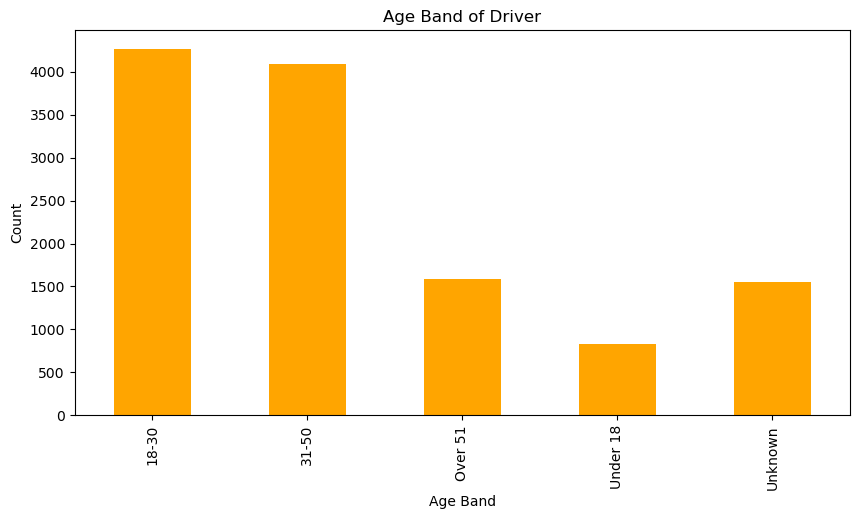

In [23]:
plt.figure(figsize=(10, 5))
plt.subplot()
df_train['Age_band_of_driver'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Age Band of Driver')
plt.xlabel('Age Band')
plt.ylabel('Count')

============================================================================================


<h1> Atribut 'Sex_of_driver'

In [24]:
df_train

,Time,Day,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Evening,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Evening,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Evening,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Late Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Late Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Evening,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Afternoon,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Afternoon,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [25]:
df_train['Sex_of_driver'].isna().sum()

0

Jumlah missing value dari atribut 'Sex of Driver' = 0

In [26]:
df_train['Sex_of_driver'].value_counts()

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

<h1> Atribut 'Educational_level'

In [27]:
df_train.drop(columns=['Educational_level'], inplace=True)

Atribut 'Educational_level' dihapus karena dianggap tidak ada hubungannya dengan mengemudi. Mengemudi merupakan sebuah pekerjaan yang membutuhkan sebuah keahlian dalam menyetir dan tidak membutuhkan pendidikan secara formal.

In [28]:
df_train

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


<h1> Atribut 'Vehicle_driver_relation'

In [29]:
df_train.loc[: , 'Time':'Vehicle_driver_relation']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation
0,Evening,Monday,18-30,Male,Employee
1,Evening,Monday,31-50,Male,Employee
2,Evening,Monday,18-30,Male,Employee
3,Late Night,Sunday,18-30,Male,Employee
4,Late Night,Sunday,18-30,Male,Employee
...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee
12312,Evening,Sunday,Unknown,Male,Employee
12313,Afternoon,Sunday,Over 51,Male,Employee
12314,Afternoon,Sunday,18-30,Female,Employee


In [30]:
df_train['Vehicle_driver_relation'].isna().sum()

579

Jumlah missing value dari atribut 'Vehicle-driver relation' = 579

In [31]:
missing_percentage(df_train,'Vehicle_driver_relation')

4.70120168886002

Persentase missing value dari atribut 'Vehicle-driver relation' : 4,7%

In [32]:
df_train['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

In [33]:
df_train['Vehicle_driver_relation'] = df_train['Vehicle_driver_relation'].fillna(df_train['Vehicle_driver_relation'].mode()[0])
df_train['Vehicle_driver_relation'].isna().sum()


0

In [34]:
df_train['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    10206
Owner        1973
Other         123
Unknown        14
Name: count, dtype: int64

In [35]:
df_train.loc[: , 'Time':'Vehicle_driver_relation']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation
0,Evening,Monday,18-30,Male,Employee
1,Evening,Monday,31-50,Male,Employee
2,Evening,Monday,18-30,Male,Employee
3,Late Night,Sunday,18-30,Male,Employee
4,Late Night,Sunday,18-30,Male,Employee
...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee
12312,Evening,Sunday,Unknown,Male,Employee
12313,Afternoon,Sunday,Over 51,Male,Employee
12314,Afternoon,Sunday,18-30,Female,Employee


<h1> Atribut 'Driving_experience'

In [36]:
df_train.loc[: , 'Time':'Driving_experience']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience
0,Evening,Monday,18-30,Male,Employee,1-2yr
1,Evening,Monday,31-50,Male,Employee,Above 10yr
2,Evening,Monday,18-30,Male,Employee,1-2yr
3,Late Night,Sunday,18-30,Male,Employee,5-10yr
4,Late Night,Sunday,18-30,Male,Employee,2-5yr
...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr


In [37]:
df_train['Driving_experience'].isna().sum()

829

In [38]:
missing_percentage(df_train, 'Driving_experience')

6.731081519974018

In [39]:
df_train['Driving_experience'].value_counts()

Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
No Licence     118
unknown         33
Name: count, dtype: int64

In [40]:
df_train['Driving_experience'] = df_train['Driving_experience'].fillna(df_train['Driving_experience'].mode()[0])
df_train['Driving_experience'].isna().sum()

0

In [41]:
df_train.loc[: , 'Time':'Driving_experience']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience
0,Evening,Monday,18-30,Male,Employee,1-2yr
1,Evening,Monday,31-50,Male,Employee,Above 10yr
2,Evening,Monday,18-30,Male,Employee,1-2yr
3,Late Night,Sunday,18-30,Male,Employee,5-10yr
4,Late Night,Sunday,18-30,Male,Employee,2-5yr
...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr


<h1> Atribut 'Type_of_vehicle'

In [42]:
df_train.loc[: , 'Time':'Type_of_vehicle']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats)
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41?100Q)
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats)
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,NaN
...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11?40Q)
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41?100Q)


In [43]:
df_train['Type_of_vehicle'].value_counts()

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

In [44]:
df_train.replace({'Lorry (41?100Q)' : 'Lorry (41 - 100 Quintal)', 'Pick up upto 10Q' : 'Pick up upto 10 Quintal', 'Lorry (11?40Q)' : 'Lorry (11 - 40 Quintal)', 'Public (13?45 seats)' : 'Public (13 - 45 seats)'}, inplace=True)

In [45]:
df_train['Type_of_vehicle'].value_counts()

Type_of_vehicle
Automobile                  3205
Lorry (41 - 100 Quintal)    2186
Other                       1208
Pick up upto 10 Quintal      811
Public (12 seats)            711
Stationwagen                 687
Lorry (11 - 40 Quintal)      541
Public (13 - 45 seats)       532
Public (> 45 seats)          404
Long lorry                   383
Taxi                         265
Motorcycle                   177
Special vehicle               84
Ridden horse                  76
Turbo                         46
Bajaj                         29
Bicycle                       21
Name: count, dtype: int64

In [46]:
df_train['Type_of_vehicle'].isna().sum()

950

In [47]:
missing_percentage(df_train, 'Type_of_vehicle')

7.713543358233192

In [48]:
df_train['Type_of_vehicle'] = df_train['Type_of_vehicle'].fillna(df_train['Type_of_vehicle'].mode()[0])
df_train['Type_of_vehicle'].isna().sum()

0

In [49]:
df_train.loc[: , 'Time':'Type_of_vehicle']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats)
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal)
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats)
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile
...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal)
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal)


<h1> Atribut 'Owner_of_vehicle'

In [50]:
df_train.loc[: , 'Time':'Owner_of_vehicle']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner
...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner


In [51]:
df_train['Owner_of_vehicle'].value_counts()

Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64

In [52]:
df_train['Owner_of_vehicle'].isna().sum()

482

In [53]:
missing_percentage(df_train, 'Owner_of_vehicle')

3.9136083143877882

In [54]:
df_train['Owner_of_vehicle'] = df_train['Owner_of_vehicle'].fillna(df_train['Owner_of_vehicle'].mode()[0])
df_train['Owner_of_vehicle'].isna().sum()

0

In [55]:
df_train.loc[: , 'Time':'Owner_of_vehicle']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner
...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner


<h1> Atribut 'Service_year_of_vehicle'

In [56]:
df_train.loc[: , 'Time':'Service_year_of_vehicle']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Above 10yr
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,NaN
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,NaN
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,5-10yrs
...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,NaN
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,NaN
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,2-5yrs
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,2-5yrs


In [57]:
df_train['Service_year_of_vehicle'].value_counts()

Service_year_of_vehicle
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64

In [58]:
df_train['Service_year_of_vehicle'].isna().sum()

3928

In [59]:
missing_percentage(df_train, 'Service_year_of_vehicle')

31.893471906463137

In [60]:
print(df_train['Service_year_of_vehicle'].value_counts())
print(df_train['Service_year_of_vehicle'].isna().sum())

contingency_table = pd.crosstab(df_train['Service_year_of_vehicle'], df_train['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Service_year_of_vehicle dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Service_year_of_vehicle dan Accident_severity.")

Service_year_of_vehicle
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64
3928
Accident_severity        Fatal injury  Serious Injury  Slight Injury
Service_year_of_vehicle                                             
1-2yr                               9             111            707
2-5yrs                             28             253           1511
5-10yrs                            16             191           1073
Above 10yr                         12             186           1126
Below 1yr                           6              43            233
Unknown                            44             408           2431
Chi-Square: 6.280520518789327
P-Value: 0.791170206989613
Kesimpulan: Tidak ada hubungan signifikan antara Service_year_of_vehicle dan Accident_severity.


In [61]:
df_train['Service_year_of_vehicle'] = df_train['Service_year_of_vehicle'].fillna('Unknown')
print(df_train['Service_year_of_vehicle'].value_counts())

Service_year_of_vehicle
Unknown       6811
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64


In [62]:
print(df_train['Service_year_of_vehicle'].value_counts())
print(df_train['Service_year_of_vehicle'].isna().sum())

contingency_table = pd.crosstab(df_train['Service_year_of_vehicle'], df_train['Accident_severity'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Kesimpulan: Ada hubungan signifikan antara Service_year_of_vehicle dan Accident_severity.")
else:
    print("Kesimpulan: Tidak ada hubungan signifikan antara Service_year_of_vehicle dan Accident_severity.")

Service_year_of_vehicle
Unknown       6811
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: count, dtype: int64
0
Accident_severity        Fatal injury  Serious Injury  Slight Injury
Service_year_of_vehicle                                             
1-2yr                               9             111            707
2-5yrs                             28             253           1511
5-10yrs                            16             191           1073
Above 10yr                         12             186           1126
Below 1yr                           6              43            233
Unknown                            87             959           5765
Chi-Square: 5.849120806763131
P-Value: 0.8277760994719556
Kesimpulan: Tidak ada hubungan signifikan antara Service_year_of_vehicle dan Accident_severity.


In [63]:
df_train.drop(columns=['Service_year_of_vehicle'], inplace=True)

In [64]:
df_train

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle,Area_accident_occured,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,No defect,Residential areas,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,No defect,Office areas,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,No defect,Recreational areas,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,No defect,Office areas,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,No defect,Industrial areas,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,No defect,Outside rural areas,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,No defect,Outside rural areas,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,No defect,Outside rural areas,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,No defect,Office areas,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


<h1> Atribut 'Defect_of_vehicle'

In [65]:
df_train.loc[: , 'Time':'Defect_of_vehicle']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Defect_of_vehicle
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,No defect
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,No defect
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,No defect
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,No defect
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,No defect
...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,No defect
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,No defect
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,No defect
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,No defect


In [66]:
df_train['Defect_of_vehicle'].value_counts()

Defect_of_vehicle
No defect    7777
7              76
5              36
Name: count, dtype: int64

In [67]:
df_train['Defect_of_vehicle'].isna().sum()

4427

In [68]:
missing_percentage(df_train, 'Defect_of_vehicle')

35.94511204936668

In [69]:
df_train.drop(columns=['Defect_of_vehicle'], inplace=True)

In [70]:
df_train

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Recreational areas,other,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Industrial areas,other,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Outside rural areas,Undivided Two way,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Office areas,Undivided Two way,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


<h1>Atribut 'Area_accident_occured'

In [71]:
df_train.loc[: , 'Time':'Area_accident_occured']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Residential areas
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Recreational areas
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Industrial areas
...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Outside rural areas
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Outside rural areas
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Outside rural areas
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Office areas


In [72]:
df_train['Area_accident_occured'].value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [73]:
df_train['Area_accident_occured'].isna().sum()

239

In [74]:
missing_percentage(df_train, 'Area_accident_occured')

1.9405651185449821

In [75]:
df_train['Area_accident_occured'] = df_train['Area_accident_occured'].fillna(df_train['Area_accident_occured'].mode()[0])

In [76]:
df_train['Area_accident_occured'].isna().sum()

0

In [77]:
df_train['Area_accident_occured'].value_counts()

Area_accident_occured
Other                              4058
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

In [78]:
simplified_area_mapping = {
    'Office areas': 'Urban',
    'Residential areas': 'Urban',
    'Industrial areas': 'Urban',
    'Market areas': 'Urban',
    'Hospital areas': 'Urban',

    'Church areas': 'Public',
    'Recreational areas': 'Public',
    'School areas': 'Public',

    'Rural village areas': 'Rural',
    'Outside rural areas': 'Rural',

    'Other': 'Other',
    'Unknown': 'Unknown',
    'Rural village areasOffice areas': 'Rural'  
}

# Bersihkan spasi di awal/akhir nilai kategori
df_train['Area_accident_occured'] = df_train['Area_accident_occured'].str.strip()

# Lakukan mapping kategori yang lebih simpel
df_train['Area_accident_occured'] = df_train['Area_accident_occured'].map(simplified_area_mapping)

# # Jika ada nilai yang tidak terpetakan, masukkan ke kategori 'Other'
# df_train['Simplified_Area'].fillna('Other', inplace=True)

# Tampilkan hasil perubahan kategori
# print(df_train[['Area_accident_occured', 'Simplified_Area']].value_counts())


In [79]:
df_train['Area_accident_occured'].value_counts()

Area_accident_occured
Urban      6151
Other      4058
Public     1803
Rural       282
Unknown      22
Name: count, dtype: int64

In [80]:
df_train.loc[: , 'Time':'Area_accident_occured']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban
...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban


<h1> Atribut 'Type_of_collision'

In [81]:
df_train.loc[: , 'Time':'Type_of_collision']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision


In [82]:
df_train['Type_of_collision']

0        Collision with roadside-parked vehicles
1                 Vehicle with vehicle collision
2                Collision with roadside objects
3                 Vehicle with vehicle collision
4                 Vehicle with vehicle collision
                          ...                   
12311             Vehicle with vehicle collision
12312             Vehicle with vehicle collision
12313             Vehicle with vehicle collision
12314             Vehicle with vehicle collision
12315             Vehicle with vehicle collision
Name: Type_of_collision, Length: 12316, dtype: object

In [83]:
df_train['Type_of_collision'].value_counts()

Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [84]:
df_train['Type_of_collision'].isna().sum()

155

In [85]:
missing_percentage(df_train, 'Type_of_collision')

1.2585254952906788

In [86]:
df_train['Type_of_collision'] = df_train['Type_of_collision'].fillna(df_train['Type_of_collision'].mode()[0])

In [87]:
df_train['Type_of_collision'].isna().sum()

0

In [88]:
collision_mapping = {
    'Vehicle with vehicle collision': 'Vehicle Collision',
    'Collision with roadside objects': 'Stationary Object Collision',
    'Collision with pedestrians': 'Pedestrian Collision',
    'Rollover': 'Self-accident',
    'Collision with animals': 'Animal Collision',
    'Collision with roadside-parked vehicles': 'Stationary Object Collision',
    'Fall from vehicles': 'Self-accident',
    'Other': 'Other',
    'Unknown': 'Unknown',
    'With Train': 'Train Collision'
}

df_train['Type_of_collision'] = df_train['Type_of_collision'].str.strip()

df_train['Type_of_collision'] = df_train['Type_of_collision'].map(collision_mapping)

In [89]:
df_train['Type_of_collision'].value_counts()

Type_of_collision
Vehicle Collision              8929
Stationary Object Collision    1840
Pedestrian Collision            896
Self-accident                   431
Animal Collision                171
Other                            26
Unknown                          14
Train Collision                   9
Name: count, dtype: int64

In [90]:
df_train.loc[: , 'Time':'Type_of_collision']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle Collision
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision


<h1> Atribut 'Road_surface_type'

In [91]:
df_train.loc[: , 'Time':'Road_surface_type']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,Tangent road with flat terrain,No junction,Asphalt roads
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,NaN,No junction,Asphalt roads
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,Tangent road with flat terrain,Y Shape,Asphalt roads
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads


In [92]:
df_train['Road_surface_type'].value_counts()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64

In [93]:
df_train['Road_surface_type'].isna().sum()

172

In [94]:
missing_percentage(df_train, 'Road_surface_type')

1.3965573238064306

In [95]:
df_train['Road_surface_type'] = df_train['Road_surface_type'].fillna(df_train['Road_surface_type'].mode()[0])

In [96]:
df_train['Road_surface_type'].isna().sum()

0

<h1> Atribut 'Light_condition'

In [97]:
df_train.loc[:, 'Time' : 'Light_conditions']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,NaN,No junction,Asphalt roads,Dry,Daylight
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit


In [98]:
df_train['Light_conditions'].value_counts()

Light_conditions
Daylight                   8798
Darkness - lights lit      3286
Darkness - no lighting      192
Darkness - lights unlit      40
Name: count, dtype: int64

In [99]:
df_train['Light_conditions'].isna().sum()

0

In [100]:
Light_mapping = {
    'Daylight': 'Daylight',
    'Darkness - lights lit': 'Darkness - lights lit',
    'Darkness - lights unlit': 'Darkness - lights unlit',
    'Darkness - no lighting': 'Darkness - lights unlit',
}

df_train['Light_conditions'] = df_train['Light_conditions'].str.strip()

df_train['Light_conditions'] = df_train['Light_conditions'].map(Light_mapping)

In [101]:
df_train['Light_conditions'].value_counts()

Light_conditions
Daylight                   8798
Darkness - lights lit      3286
Darkness - lights unlit     232
Name: count, dtype: int64

In [102]:
df_train.loc[:, 'Time':'Light_conditions']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,NaN,No junction,Asphalt roads,Dry,Daylight
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit


<h1> Atribut 'Weather_condition'

In [103]:
df_train.loc[:, 'Time' : 'Weather_conditions']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal


In [104]:
df_train['Weather_conditions'].value_counts()

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

In [105]:
df_train['Weather_conditions'].isna().sum()

0

<h1> Atribut 'Vehicle_movement'


In [106]:
df_train.loc[:,'Time':'Vehicle_movement']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision,2,2,Going straight
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,2,Going straight
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision,2,2,Going straight
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,2,Going straight
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,2,Going straight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,1,Going straight
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,1,Other
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,1,1,Other
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,1,Other


In [107]:
df_train['Vehicle_movement'].value_counts()

Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64

In [108]:
df_train['Vehicle_movement'].isna().sum()

308

In [109]:
df_train['Vehicle_movement'] = df_train['Vehicle_movement'].fillna(df_train['Vehicle_movement'].mode()[0])

In [110]:
df_train['Vehicle_movement'].value_counts()

Vehicle_movement
Going straight         8466
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64

In [111]:
movement_mapping = {
    'Going straight' : 'Moving forward',
    'Overtaking' : 'Moving forward',
    'Entering a junction' : 'Moving forward',

    'Reversing' : 'Moving backward',
    'Moving Backward' : 'Moving backward',

    'U-Turn' : 'Turning',
    'Turnover' : 'Turning',

    'Stopping' : 'Stopping',
    'Waiting to go' : 'Stopping',
    'Parked' : 'Stopping',

    'Getting off' : 'Exiting',

    'Other' : 'Other',
    'Unknown' : 'Unknown'
}

df_train['Vehicle_movement'] = df_train['Vehicle_movement'].str.strip()

df_train['Vehicle_movement'] = df_train['Vehicle_movement'].map(movement_mapping)

In [116]:
df_train['Vehicle_movement'].value_counts()

Vehicle_movement
Moving forward     8755
Moving backward    1548
Other               937
Turning             539
Exiting             339
Stopping            110
Unknown              88
Name: count, dtype: int64

In [112]:
df_train['Vehicle_movement'].isna().sum()

0

In [113]:
df_train.loc[:,'Time':'Vehicle_movement']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision,2,2,Moving forward
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,2,Moving forward
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision,2,2,Moving forward
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,2,Moving forward
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,2,Moving forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,1,Moving forward
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,1,Other
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,1,1,Other
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,1,Other


<h1> Atribut 'Casualty_class'

In [114]:
df_train.loc[:, 'Time' : 'Casualty_class']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,...,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision,2,2,Moving forward,na
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,...,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,2,Moving forward,na
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,...,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision,2,2,Moving forward,Driver or rider
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,...,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,2,Moving forward,Pedestrian
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,...,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,2,Moving forward,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,...,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,1,Moving forward,na
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),...,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,1,Other,na
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),...,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,1,1,Other,Driver or rider
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,...,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,1,Other,na


In [115]:
df_train['Casualty_class'].value_counts().dtype()

TypeError: 'numpy.dtypes.Int64DType' object is not callable

'na'???

In [ ]:
df_train['Casualty_class'].isna().sum()

0

In [ ]:
df_train.drop(columns=['Casualty_class'], inplace=True)

In [ ]:
df_train.loc[:, 'Time' : 'Vehicle_movement']

,Time,Day,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement
0,Evening,Monday,18-30,Male,Employee,1-2yr,Automobile,Owner,Urban,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision,2,2,Moving forward
1,Evening,Monday,31-50,Male,Employee,Above 10yr,Public (> 45 seats),Owner,Urban,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,2,Moving forward
2,Evening,Monday,18-30,Male,Employee,1-2yr,Lorry (41 - 100 Quintal),Owner,Public,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Stationary Object Collision,2,2,Moving forward
3,Late Night,Sunday,18-30,Male,Employee,5-10yr,Public (> 45 seats),Governmental,Urban,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,2,Moving forward
4,Late Night,Sunday,18-30,Male,Employee,2-5yr,Automobile,Owner,Urban,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,2,Moving forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Evening,Wednesday,31-50,Male,Employee,2-5yr,Lorry (11 - 40 Quintal),Owner,Rural,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,1,Moving forward
12312,Evening,Sunday,Unknown,Male,Employee,5-10yr,Automobile,Owner,Rural,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,2,1,Other
12313,Afternoon,Sunday,Over 51,Male,Employee,5-10yr,Bajaj,Owner,Rural,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle Collision,1,1,Other
12314,Afternoon,Sunday,18-30,Female,Employee,Above 10yr,Lorry (41 - 100 Quintal),Owner,Urban,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle Collision,2,1,Other


<h1> Save the cleaned datasets

In [ ]:
df_train.to_csv('../datasets/Road Traffic Accidents/RTA_Datasest_Cleaned_V1.csv', index=False)